# Naive Bayes

## Write your id numbers and names here


1.   313326985 Shahar Shcheranski
2.   206172686 Sarit Hollander


## 1. Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model), in contrast to the Multivariate Logistic Regression (a discriminative model) we used before.

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use
```
mnist = sklearn.datasets.fetch_mldata('MNIST original')
```
to fetch the original data. You may set the `data_home` to where you wish to download your data for caching. Each image is already transformed into a 1D integer array $x\in [0,255]^{784}$, and the corresponding label is an integer $y\in [0,9]$.

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.

---
**Note 1:** Using `digits = sklearn.datasets.load_digits()` will only fetch a very small sample of the original set, with images resized to 8x8. This preprocessing of the data reduces dimensionality and gives invariance to small distortions - however, we will use the original data in this exercise. Feel free to test the proformance of the algorithms below on the preprocessed data as well.

**Note 2:**
Since ML-Data is deprecated, you may wish to use something like this:
>```
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
```

In [ ]:
from keras.datasets import mnist

# The MNIST data already divided into train and test sets, using 1/7 of the data for testing
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)




11501568/11490434 [==============================] - 0s 0us/step


Single sample of each digit as the original image:


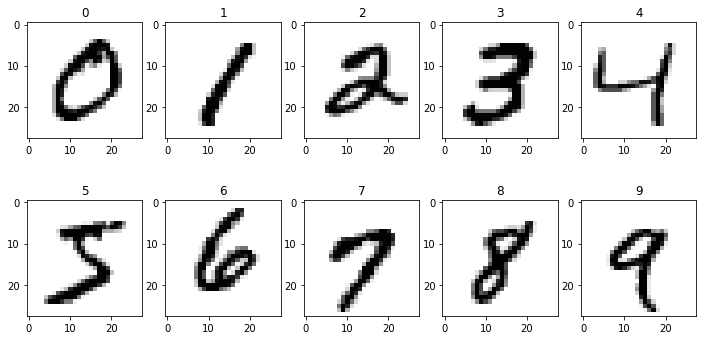

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# The plot of a single sample of each digit as the original image
plt.figure(figsize=(12,6))
for i in range(10):
    im_idx = np.argwhere(y_train == i)[0]
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(np.reshape(x_train[im_idx], (28, 28)), cmap='gray_r')
print("Single sample of each digit as the original image:")
plt.show()

### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Write the classification rule based on this Naive Bayes model.
How would you esitmate each of the parameters of the model based on the trainning data?
Describe in text (preferably math notationns) the classification rule, and explain.

**Bonus:** Think of edge cases which may effect your estimator in an undesired way.

#### Answer 1
$$
\begin{align}
\text{In the following answer y is the class that has 10 possibilities (the digits 0 - 9)}
\end{align}
$$
$$
\begin{align}
\text{and x is the image that represented by a vector } x = (x_1, ... , x_{784}) \text{ representing 784 features (pixls). }
\end{align}
$$

$$
\begin{align}
\textbf{The classification rule based on this Naive Bayes model:}
\end{align}
$$


$$
\begin{align}
\hat{y} = \arg\max_{j\in [0,9]} Pr(y = j) \prod_{i=1}^{784} Pr(x_i \mid y = j)
\end{align}
$$

$$
\begin{align}
\text {By given an instance x we want to find the y that gives the maximum }
\end{align}
$$
$$
\begin{align}
\text {value, and this y will be the classification of this instance.}  
\end{align}
$$

$$
\begin{align}
\text{Notice that multiplying lots of probabilities can result in floating-point underflow.}
\end{align}
$$
$$
\begin{align}
\text{ Because } i \in [0,784] \text{, the result of  the multiplying probabilities } \prod_{i=1}^{784}Pr(x_i \mid y = j) \text{ can underflow, so instead it is better to sum log of probabilities.}
\end{align}
$$

$$
\begin{align}
\\\Downarrow\\\
\hat{y} = \arg\max_{j\in [0,9]} log Pr(y = j) + \sum_{i=1}^{784} \log Pr(x_i \mid y = j)
\end{align}
$$

$$
\begin{align}
\textbf{Esitmation each of the parameters of the model based on the trainning data:}
\end{align}
$$

$$
\begin{align}
Pr(y = j)= \frac{\# y = j}{\#samples}
\end{align}
$$

$$
\begin{align}
\text{The decision rule for Bernoulli Naive Bayes is based on:}
\end{align}
$$

$$
\begin{align}
Pr(x_i \mid y = j) = Pr(i \mid y = j) x_i + (1 - Pr(i \mid y = j)) (1 - x_i)
\end{align}
$$

$$
\begin{align}
\\\Downarrow\\\
Pr(x_i \mid y = j) = \begin{cases}
\frac{\Pr(y = j\  \cap\ x_i = 1)}{\Pr(y = j)}  , \text{ if}\ x_i = 1\\  
\frac{\Pr(y = j\  \cap\ x_i = 0)}{\Pr(y = j)}  , \text{ if}\ x_i = 0\\
\end{cases}
\end{align}
$$

**Bonus**

Edge cases:
Zero Frequency- if categorical variable has a category in the test set, which was not observed in training set, the probability will be 0. we can overcome this issue with Laplace estimation which is a smoothing technique.

#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


#### Answer 2


In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Preprocess of the data - each pixel would become either black (0) or white (1)
# The deafult threshold for binarizing (mapping to booleans) of sample features is 0
BNBclf = BernoulliNB()
BNBclf.fit(x_train, y_train)

BernoulliNB()

The mean image of each digit:


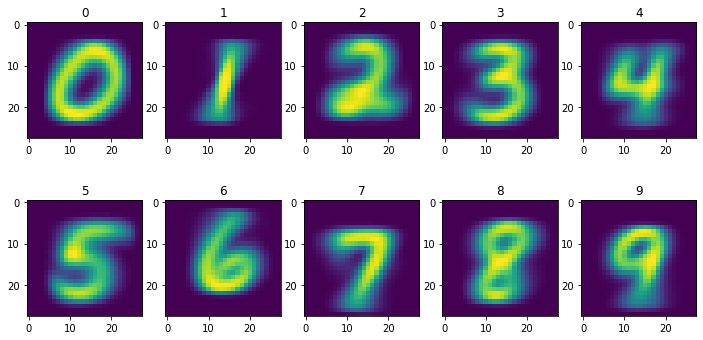

Generate one sample of each class:


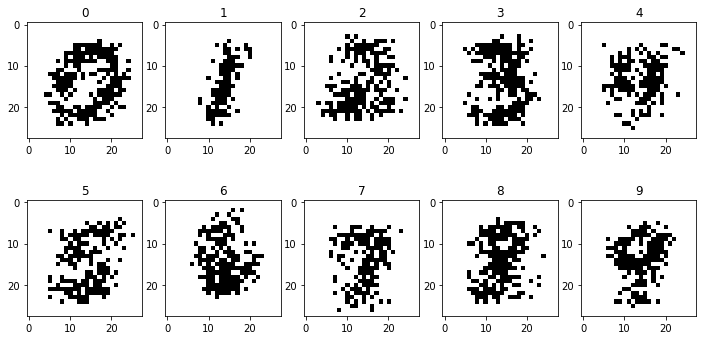

In [ ]:
# answer 1

# Calculate the mean image of each class
px_prob = np.exp(BNBclf.feature_log_prob_)
mean_images = px_prob*255

# Plot of the mean image of each class
plt.figure(figsize=(12,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(mean_images[i].reshape((28,28)))
print("The mean image of each digit:")
plt.show()

# Generate one sample of each class
plt.figure(figsize=(12,6))
for i in range(10):
    sample = []
    for px in range(len(mean_images[i])):
      sample.append(np.random.binomial(size = 1, n = 1, p = px_prob[i][px])[0])
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(np.asarray(sample).reshape((28,28)), cmap='gray_r')
print("Generate one sample of each class:")
plt.show()

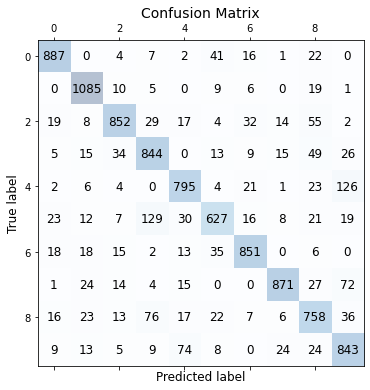

Total accuracy: 0.8413


In [ ]:
# answer 2

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
y_true = BNBclf.predict(x_test)
conf_matrix  = confusion_matrix(y_test, y_true)

# The plot of the confusion matrix of your classifier, as claculated on the test data
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')

plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# Calculate the total accuracy
print("Total accuracy: " + str(BNBclf.score(x_test, y_test, sample_weight=None)))

In [ ]:
import numpy
numpy.version.version

'1.19.5'

**Summary of results:**
We can see from the confusion matrix that the digit the model was able to predict best is 1, and the most difficult to predict is 5. Also it confused most between 9 to 4 and 3 to 5, which make sence to us, since even to humans it's sometimes difficult to distinct between 9 and 4.
The model tagged at least once of each digit as 2 and 8, but never confused between unsimilar digits like 0 and 1. 7 was never tagged as 5, but 5 taagged as 7 eight times, we assume the reason for that is because 5 in handwriting could be very inaccurate but 7 is more clear.


answer 3

Thresholding uses the pixel values in an image to segment the image into two regions: a particle region, which contains the objects under inspection (the digit), and a background region.
To find the optimal threshold of the binarization part we can use the histogram of each image.

   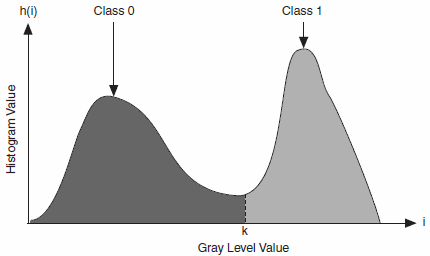


*   i represents the gray level value
*   k represents the gray level value chosen as the threshold
*   h(i) represents the number of pixels in the image at each gray level value

We will determine the threshold pixel value k such that all gray-level than or equal to k belong to one class 0 (for the digit) and the other gray-level values belong to another class 1 (for the background).
We will find the optimal k between the two maximum peaks.









## 2. Classifing Text Documents using Multinomial Naive Bayes
In this exercise you will classify the "20 newsgroups" data set using your own naive bayes classifier and compare to the scikit learn built in version.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.

### You task
Implement the barebone class provided: `NaiveBayes(BaseEstimator, ClassifierMixin)` and implement its `fit`, `predict` and `predict_proba` methods.

Then follow next anlysis guidlinnes using the implemented class for train and test classifier:
* Load the **train** data using `from sklearn.datasets import fetch_20newsgroups`. remove headers, footers and quotes (see documentation)
* Use `sklearn.feature_extraction.text import CountVectorizer` to count words (stop_words='english')
* use `sklearn.pipeline.make_pipeline` to chain the vectroizer and model.
* note: limit the vocuabolary size if you suffer memory issues
* compare the accuracy over the **test** data. You can use `accuracy_score, classification_report`
* compare to the built in `sklearn.naive_bayes.MultinomialNB`
* compare to `TfidfVectorizer` preprocessing (you can use the built in model for doing the analysis)
* plot the learning curve - is the model in the bias or variance regime (you can use the built in model for doing the analysis)
* optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.).


In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import binarize
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups
from  sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

class NaiveBayes(BaseEstimator, ClassifierMixin):

  def fit(self, x, y):
    """
    fit the model
    :param x: data
    :param y: data classification
    :return: fitted model
    """
    self.class_prob = {}
    self.word_prob = {}
    class_count = Counter(y)

    for key in class_count.keys():

      # probability of each class
      self.class_prob[key] = class_count[key] / len(y)

      # filter the documents of the class
      docs = x[y == key]

      # sum for each word the number of appearances in a class
      sum_of_each_word_in_class = [sum(x) for x in zip(*docs)]
      # use laplace smoothing to make sure the probability will not be 0
      sum_of_each_word_in_class = sum_of_each_word_in_class[0].toarray()[0] + 0.01

      # probabilty of each word in the class
      self.word_prob[key] = sum_of_each_word_in_class / sum_of_each_word_in_class.sum()

    return self

  def predict_log_proba(self, x):
    """
    Return log-probability estimates for the test vector x
    :param x: data to calculate probabilities on
    :return: log-probability of the samples for each class in the model
    """

    probas = []
    probas_dict = {}
    all_classes = list(self.class_prob.keys())
    for row in x:
      curr_probas_dict = probas_dict.copy()
      for c in all_classes:

        # filter out words that not appear in the document
        filter_zero = (row > 0).toarray()[0]
        probability = self.word_prob[c][filter_zero]
        non_zero_appearances = row.toarray()[0][filter_zero]

        # multiply word's number of appearances in it's probability and log the outcome
        curr_prob = np.log(np.multiply(probability, non_zero_appearances))

        # sum the log probabilities
        curr_prob = curr_prob.sum()

        # adding the log probability of the class
        curr_prob = curr_prob + np.log(self.class_prob[c])

        # add to the dictionary the probability of the class
        curr_probas_dict[c] = curr_prob

      probas.append(curr_probas_dict)

    return probas

  def predict(self, x):
    """
    Perform classification on an array of test vectors x
    :param x: data to predict
    :return: Predicted target values for x
    """
    # get the probabilities of each document for each class
    probas = self.predict_log_proba(x)

    preds = []
    for row_probas in probas:
      # get the class with the max probability
      preds.append(max(row_probas, key=row_probas.get))

    return preds


# train and test sets
train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

cv = CountVectorizer(stop_words={'english'})

# Our Naive Bayes model prediction using CountVectorizer
my_nb_clf = make_pipeline(cv, NaiveBayes())
my_nb_clf.fit(train.data, train.target)
my_nb_clf.predict_log_proba(test.data)
y_pred = my_nb_clf.predict(test.data)
print("accuracy of our NaiveBayes: " + str(accuracy_score(test.target, y_pred)))

# prediction using CountVectorizer and MultinomialNB classifier
mnb_cv_clf = make_pipeline(cv, MultinomialNB())
mnb_cv_clf.fit(train.data, train.target)
y_pred = mnb_cv_clf.predict(test.data)
print("accuracy of MultinomialNB with cv: " + str(accuracy_score(test.target, y_pred)))

# prediction using TfidfVectorizer and MultinomialNB classifier
tf_idf = TfidfVectorizer()
mnb_tfidf_clf = make_pipeline(tf_idf, MultinomialNB())
mnb_tfidf_clf.fit(train.data, train.target)
y_pred = mnb_tfidf_clf.predict(test.data)
print("accuracy of MultinomialNB with tf-idf: " + str(accuracy_score(test.target, y_pred)))


accuracy of our NaiveBayes: 0.6441848114710568
accuracy of MultinomialNB with cv: 0.5431492299522039
accuracy of MultinomialNB with tf-idf: 0.6062134891131173


In [ ]:
################# optimization ###############

print('Optimization Performance:')

# prediction using MultinomialNB and CountVectorizer with hyper parameters - max features = 10000
cv_with_max_features = CountVectorizer(stop_words={'english'}, max_features=10000)
opt_mnb_cv_clf = make_pipeline(cv_with_max_features, MultinomialNB())
opt_mnb_cv_clf.fit(train.data, train.target)
y_pred = opt_mnb_cv_clf.predict(test.data)
print("accuracy of MultinomialNB with cv hyper param of max_features=10000 is: " + str(accuracy_score(test.target, y_pred)))

# prediction using MultinomialNB and CountVectorizer with hyper parameters - min document frequency= 10, max= 1000
cv_with_doc_freq_params = CountVectorizer(stop_words={'english'}, min_df=10, max_df=1000)
opt_mnb_cv_clf2 = make_pipeline(cv_with_doc_freq_params, MultinomialNB())
opt_mnb_cv_clf2.fit(train.data, train.target)
y_pred = opt_mnb_cv_clf2.predict(test.data)
print("accuracy of MultinomialNB with cv hyper params of min_df=10, max_df=1000 is: " + str(accuracy_score(test.target, y_pred)))

# prediction using MultinomialNB and TfidfVectorizer with hyper parameters - max document frequency = 0.1
tf_idf_with_max_freq_param = TfidfVectorizer(stop_words={'english'}, max_df=0.1)
opt_mnb_tfidf_clf = make_pipeline(tf_idf_with_max_freq_param, MultinomialNB())
opt_mnb_tfidf_clf.fit(train.data, train.target)
y_pred = opt_mnb_tfidf_clf.predict(test.data)
print("accuracy of MultinomialNB with tfidf hyper param of max_df=0.1 is: " + str(accuracy_score(test.target, y_pred)))

# prediction using MultinomialNB and TfidfVectorizer with hyper parameters - max document frequency = 0.05
tf_idf_with_max_freq_param2 = TfidfVectorizer(stop_words={'english'}, max_df=0.05)
opt_mnb_tfidf_clf2 = make_pipeline(tf_idf_with_max_freq_param2, MultinomialNB())
opt_mnb_tfidf_clf2.fit(train.data, train.target)
y_pred = opt_mnb_tfidf_clf2.predict(test.data)
print("accuracy of MultinomialNB with tfidf hyper param of max_df=0.05 is: " + str(accuracy_score(test.target, y_pred)))

Optimization Performance:
accuracy of MultinomialNB with cv hyper param of max_features=10000 is: 0.613781200212427
accuracy of MultinomialNB with cv hyper params of min_df=10, max_df=1000 is: 0.6319702602230484
accuracy of MultinomialNB with tfidf hyper param of max_df=0.1 is: 0.6739245884227297
accuracy of MultinomialNB with tfidf hyper param of max_df=0.05 is: 0.6802973977695167


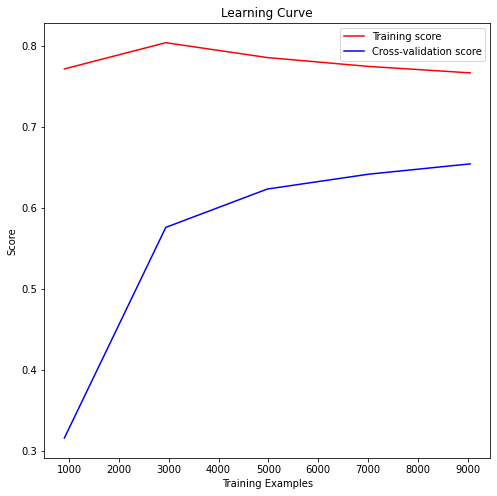

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# learning curve plot over MultinomialNB and count vectorizer with hyper parameters of min document frequency= 10, max= 1000 (after optimization)
plt.figure(figsize=(8, 8))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(opt_mnb_cv_clf, train.data, train.target, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, color="r",
          label="Training score")
plt.plot(train_sizes, test_scores_mean, color="b",
          label="Cross-validation score")

plt.legend(loc="best")
plt.show()

The variance gets higher when the gap between the curves increases.
We can see the curve is rising and has not yet stabilized.
The bias starts high and decreasing when there are more records,
adding recoreds also reduceses the variance.


### Bonus I (5 points)
#### Model interpretability
Find the most important features for a **specific** decision of a NB classifier.
Because the model has learned the prior $p(x_i|c)$ during the training, the contribution of an individual feature value can be easily measured by the posterior, $p(c|x_i)=p(c)p(x_i|c)/p(x_i)$
Implement a function which gets a scikit-learn NB model as input and returns $P(c|x_i)$:

`def calc_p_c_given_xi(model)`

Hint: Use the following model properties:

* `model.class_log_prior_`
* `model.feature_log_prob_`

Note: remember these are logs and you need to use np.exp and normalize to get $P(c|x_i)$
Another hint: use numpy built-in broadcasting property.

* Use the interpretation to examine errors of the classifier where $\hat{c}\ne c$. Which top words support the correct class and which support the wrong class? You can use the `print_txt` below to color words.

In [ ]:
import string

def print_txt(txt, hot, cold):
  """
  print the text, coloring hot and cold words with colors
  """
  cold_color='\x1b[41;37m{}\x1b[0m'
  mid_color='\x1b[44;37m{}\x1b[0m'
  hot_color='\x1b[42;37m{}\x1b[0m'
  def color(token):
    lower = str(token).lower()
    lower = lower.replace('\t','').replace('\n','')
    lower = lower.translate(string.punctuation)
    if (lower in hot) and (lower in cold):
      return mid_color.format(token)
    elif lower in hot:
      return hot_color.format(token)
    elif lower in cold:
      return cold_color.format(token)
    else:
      return token
  colored_txt = " ".join([color(token) for token in txt.split(' ')])
  print(colored_txt)
print_txt('This word support the first class but this the other', ['word'],['other'])

This word support the first class but this the other


In [ ]:
# Implementationn for 1st bonus

import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline


def calc_p_c_given_xi(model):
    # normalized probabilities
    p_c = np.exp(model.class_log_prior_.reshape(len(model.class_log_prior_), 1))
    p_xi_given_c = np.exp(model.feature_log_prob_)

    # sum the probability of each word in all classes
    p_xi = np.sum(p_xi_given_c, axis=0)

    # word probability given class multiply by class probability
    mult_probs = p_xi_given_c * p_c

    # divide by word probability
    p_c_given_xi = mult_probs / p_xi

    return p_c_given_xi


train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

mnb_clf = MultinomialNB()
tf_idf_vec = TfidfVectorizer(stop_words={'english'}, max_df=0.1)
model = make_pipeline(tf_idf_vec, mnb_clf)

model.fit(train.data, train.target)
y_pred = model.predict(test.data)

class_given_xi = calc_p_c_given_xi(mnb_clf)

# find all the matching classes
diff = y_pred == test.target
# get all the words
words = tf_idf_vec.get_feature_names()
# get the classes names
classes = test.target_names
top_words = 1000

# find the words that support the correct class and those who supports the wrong class
for i in range(len(diff)):
    # if predicted class doesnt match the actual class (wrong prediction)
    if not diff[i]:
        predicted_class = y_pred[i]
        actual_class = test.target[i]

        # find top words affected the predicted class
        top_words_affected_on_pred_class = np.argpartition(class_given_xi[predicted_class], -1 * top_words)[-1 * top_words:]
        top_words_affected_on_pred_class = np.take(words, top_words_affected_on_pred_class)

        # find top words affected the actual class
        top_words_affected_on_actual_class = np.argpartition(class_given_xi[actual_class], -1 * top_words)[-1 * top_words:]
        top_words_affected_on_actual_class = np.take(words, top_words_affected_on_actual_class)

        # print the results (yellow is words in common for both class)
        print("document #" + str(i) + " out of " + str(len(diff)) + ". actual class: " + str(classes[actual_class]) +
              ", predicted class:" + str(classes[predicted_class]))
        print("text:\n")
        text = test.data[i]

        # green color for hot, red for cold, blue for common
        print_txt(text, top_words_affected_on_actual_class, top_words_affected_on_pred_class)
        print("\n")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Streaming output truncated to the last 5000 lines.
text:




document #6998 out of 7532. actual class: rec.sport.hockey, predicted class:sci.crypt
text:



You wouldn't have to put my name at the bottom if you simply appended a 
standard disclaimer that the opinions expressed in your petition in no
way claim to represent the views of either rec.sport.hockey or the internet
as a whole.  You have surely seen these disclaimers appended to the postings
of many who work for companies and post on the net.  The disclaimers, clever
though some of them may be, are there for a reason.

 
-- 


document #7000 out of 7532. actual class: talk.politics.misc, predicted class:talk.politics.guns
text:

                                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

 Which is a helluva lot more than any Republican attorney general ever did!

 BTW, why all the crocodile tears over wasting a few religious nuts, who
 wanted to be wasted anyway?  We just got back from wasting a few hundred
 thousand

### Bonus II (5 points)
#### How can you correct the analyzed error?

To read more about model interpretation, see the blogpost below and the tutorial:
* https://lilianweng.github.io/lil-log/2017/08/01/how-to-explain-the-prediction-of-a-machine-learning-model.html
* https://github.com/chanansh/right_but_why

Answer for 2nd bonus

1. For each class, add a list of weighted words that would help the model in the prediction, since the frequency of more general words for some categories might affect the model's decision.
Adding a weight to words will help increase the precision.

2. Use the hyper parameter of min_df, max_df of the vectorizer to control the amount of terms frequncy in order to ignore frequent terms.
You can see this improves the scoring simply by looking in our question 2 prediction results (optimization part), when decreasing max_df parameter.

3. We can also ignore documents with no text (as we saw there are) and improve model prediction.